In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/NLP_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/NLP_dataset/imdb_urdu_reviews_test.csv
/content/drive/MyDrive/NLP_dataset/imdb_urdu_reviews_train.csv


In [ ]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install urduhack

  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Attempting uninstall: Click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 2.2.5 requires click>=8.0, but you have click 7.1.2 which is incompatible.
dask 2023.8.1 requires click>=8.0, but you have click 7.1.2 which is incompatible.
distributed 2023.8.1 requires click>=8.0, but you have click 7.1.2 which is incompatible.
fiona 1.9.6 requires click~=8.0, but you have click 7.1.2 which is incompatible.
pip-tools 6.13.0 requires click>=8, but you have click 7.1.2 which is incompatible.
typer 0.12.3 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.


In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/NLP_dataset/imdb_urdu_reviews_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/NLP_dataset/imdb_urdu_reviews_test.csv")

train_data.head(), test_data.head()

(                                              review sentiment
 0  میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...  positive
 1  چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...  negative
 2  ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...  positive
 3  مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...  negative
 4  یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...  positive,
                                               review sentiment
 0  یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...  negative
 1  بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...  negative
 2  یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...  negative
 3  اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...  positive
 4  پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...  positive)

In [ ]:
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(50000, 2)


In [ ]:
df= data
df

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
...,...,...
49995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
49996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
49997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
49998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


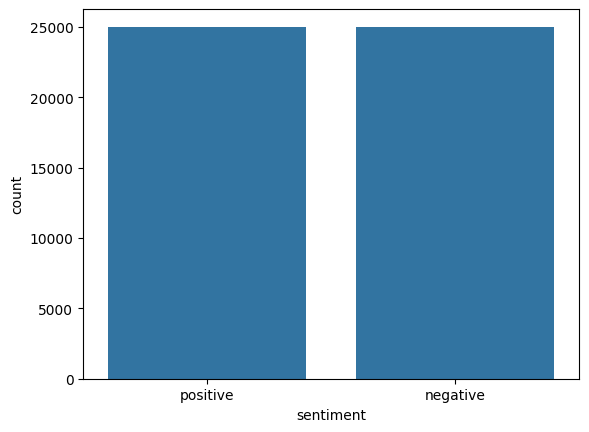

In [ ]:
sns.countplot( x = 'sentiment', data = df );

In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df['review'] = df['review'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['review'] = df['review'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['review'] = df['review'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['review'] = df['review'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['review'] = df['review'].apply(replace_emails) # Replace all emails in text str with replace_with str.
df['review'] = df['review'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['review'] = df['review'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['review'] = df['review'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['review'] = df['review'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [ ]:
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())

def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "

    return lemme_str

In [ ]:
df['review'] =  df['review'].apply(remove_stopwords)

In [ ]:
df['lemmatized_text'] = df['review'].apply(lemitizeStr)

In [ ]:
df.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...


In [ ]:
#Now we have cleansed text in lemmatized_text and encoded version of sentiment column as encoded_sentiments.

#Data is prepared for the Modeling.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'],
                                                    df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (35000,)
Shape of X_test (15000,)
Shape of Y_train (35000,)
Shape of Y_test (15000,)


In [ ]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)

test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
# check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((35000, 50000), (15000, 50000))

In [ ]:
# Make copy of Dataset to prepare for Word2Vector
df_w2v = df.copy()

In [ ]:
df_w2v.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...


In [ ]:
# Word to Vector Model
# Word2Vec consists of models for generating word embedding.
# These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer.

In [ ]:
pip install spacy

  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
urduhack 1.1.1 requires Click~=7.1, but you have click 8.1.7 which is incompatible.


In [ ]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["lemmatized_text"].apply(tokenizer)

In [ ]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], vector_size=64, window=5, workers=10, min_count=1)
# model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], size=64, window=5, workers=10, min_count = 1)

In [ ]:
model_word2vec.wv.most_similar("مرد")

[('مردوں', 0.8568776845932007),
 ('خواتین', 0.8291634321212769),
 ('عورتوں', 0.7491912841796875),
 ('عورتیں', 0.7353406548500061),
 ('سیسہ', 0.7148597240447998),
 ('مردانہ', 0.694551408290863),
 ('بوڑھی', 0.6424700021743774),
 ('بوڑھے', 0.6390315294265747),
 ('عورت', 0.6236459016799927),
 ('جوڑے', 0.6230304837226868)]

In [ ]:
model_word2vec.wv.most_similar("عورت")

[('لڑکی', 0.8245614767074585),
 ('عورتیں', 0.7992520332336426),
 ('خاتون', 0.7905367016792297),
 ('بیوی', 0.7501325607299805),
 ('عورتوں', 0.7357499599456787),
 ('بوڑھی', 0.6976534128189087),
 ('کنواری', 0.6930092573165894),
 ('خواتین', 0.6877790093421936),
 ('ماں', 0.6859532594680786),
 ('مردوں', 0.6824020743370056)]

In [ ]:
model_word2vec.wv.most_similar("خوفناک")

[('بھیانک', 0.847086489200592),
 ('ہولناک', 0.8247584104537964),
 ('خراب', 0.8091375827789307),
 ('چوس', 0.7439711093902588),
 ('ناقص', 0.7245618104934692),
 ('شوقیہ', 0.6932067275047302),
 ('بیکار', 0.6893044114112854),
 ('لنگڑا', 0.6842212677001953),
 ('گڑبڑ', 0.6829301118850708),
 ('شرمناک', 0.6821628212928772)]

In [ ]:
model_word2vec.wv.most_similar("فلم")

[('مووی', 0.8119089007377625),
 ('چیز', 0.7986483573913574),
 ('فلموں', 0.7176221013069153),
 ('بہرحال', 0.686877965927124),
 ('ایمانداری', 0.6866374611854553),
 ('فلمیں', 0.6844547986984253),
 ('کہوں', 0.6819835901260376),
 ('سوچا', 0.676567018032074),
 ('از', 0.6721555590629578),
 ('واقعتا', 0.6549874544143677)]

**Embedding Layer Preparation**

In [ ]:
# VOCAB_SIZE = len(model_word2vec.wv.vocab)
VOCAB_SIZE = len(model_word2vec.wv.key_to_index)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [ ]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(101871, 128, 1398)

The VOCAB_SIZE shows the size of vocabulary.
We set the size of dimension to 128 to reduce the dimensions of data.
The MAX_LEN represents the Maximum length of Sentence in dataset.

In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

In [ ]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

Streaming output truncated to the last 5000 lines.
96869 پریمکرافٹ
96870 جنسیٹس
96871 انکونزموں
96872 بھوسیوں
96873 انیسیٹ
96874 انوفر
96875 تردیدیں
96876 پیٹسیری
96877 واٹیل
96878 ہمام
96879 گنگنارہے
96880 منزانوس
96881 بروچرو
96882 پکائی
96883 فینل
96884 کنگون
96885 چیبت
96886 ویوکس
96887 گارکن
96888 آسٹرمین
96889 جیگوکوہین
96890 پیٹڈے
96891 والریانا
96892 مانوئیل
96893 سیکرستان
96894 دھندلگیا
96895 پھپ
96896 ٹرنڈ
96897 آفٹین
96898 سیچرز
96899 کریمنللی
96900 پیرنتھہڈ
96901 ڈیزلیئر
96902 مونٹے
96903 کابرینی
96904 کوٹرس
96905 جوکوکس
96906 کوسیز
96907 کوکیس
96908 اٹاموس
96909 جھیلکوں
96910 دوکھیبازوں
96911 ڈیپی
96912 بولڈوگ
96913 پورکیپائن
96914 شاہٹ
96915 سائینک
96916 بجاؤ
96917 فیتلز
96918 ڈیلنی
96919 اسمارٹس
96920 کودیکھ
96921 توکوئی
96922 کا
96923 کرپٹولوجی
96924 ونڈرفلز
96925 برٹونی
96926 آرتھوپراکسس
96927 سکریپشن
96928 چیچہ
96929 ٹرینگٹیگناٹ
96930 سوبوسنسک
96931 کرونسیاں
96932 ایگلگڈینس
96933 موہبیتین
96934 نکانے
96935 ڈورکن
96936 کسپلرس
96937 ٹرافیاں
96938 بنڈئی
96939 گنڈمس
96940

In [ ]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [ ]:
train_label = df_w2v.encoded_sentiments

In [ ]:
type(train_label[0])

numpy.int64

Split the dataset into train and test data.

In [ ]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [ ]:
train_sentences

array([[ 1815, 37212,  2435, ...,     0,     0,     0],
       [ 1947, 10334,  3796, ...,     0,     0,     0],
       [  232,   237,     1, ...,     0,     0,     0],
       ...,
       [    1,    12,   102, ...,     0,     0,     0],
       [  182,   310,  6974, ...,     0,     0,     0],
       [ 6431,  1415,  2994, ...,     0,     0,     0]])

Using RNN Model

**Long Short Term Memory**
As LSTM models works good on text data, as they considered the sequences of inputs to make predictions. We will try LSTM Model on this data

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
lstm_uni = Sequential()
lstm_uni.add(Embedding(VOCAB_SIZE+1, DIMENSIONS,
                       embeddings_initializer=Init.Constant(words2vec_matrix),
                       input_length=MAX_LEN, trainable=False))
lstm_uni.add(LSTM(256, activation='tanh'))
lstm_uni.add(Dense(128, activation='tanh'))
lstm_uni.add(Dropout(0.5))
lstm_uni.add(Dense(64, activation='tanh'))
lstm_uni.add(Dropout(0.5))
lstm_uni.add(Dense(1, activation='sigmoid'))

lstm_uni.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1398, 128)         13039616  
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
lstm_uni.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
LSTM_NET_uni = lstm_uni.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 108s 79ms/step - loss: 0.7085 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 2/10
1000/1000 [==============================] - 77s 77ms/step - loss: 0.6966 - accuracy: 0.5023 - val_loss: 0.6941 - val_accuracy: 0.4999
Epoch 3/10
1000/1000 [==============================] - 81s 81ms/step - loss: 0.6953 - accuracy: 0.4983 - val_loss: 0.6944 - val_accuracy: 0.4999
Epoch 4/10
1000/1000 [==============================] - 79s 79ms/step - loss: 0.6951 - accuracy: 0.4970 - val_loss: 0.6942 - val_accuracy: 0.4999


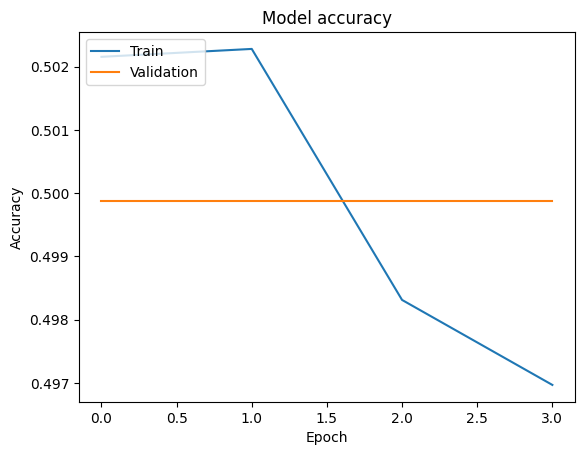

In [ ]:
plt.plot(LSTM_NET_uni.history['accuracy'])
plt.plot(LSTM_NET_uni.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

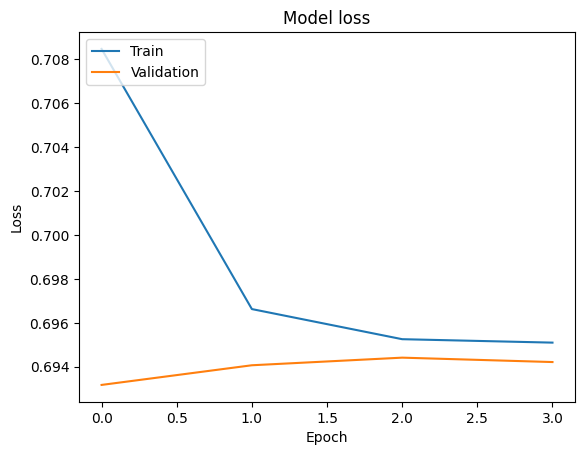

In [ ]:
plt.plot(LSTM_NET_uni.history['loss'])
plt.plot(LSTM_NET_uni.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(lstm_uni.predict(test_sentences).round(), test_tags))

313/313 [==============================] - 10s 30ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.50      0.67     10000

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.34     10000
weighted avg       1.00      0.50      0.67     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Bi-Directional LSTM**

In [ ]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.5))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.5))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1398, 128)         13039616  
                                                                 
 bidirectional (Bidirection  (None, 512)               788480    
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 156s 151ms/step - loss: 0.7160 - accuracy: 0.5002 - val_loss: 0.6965 - val_accuracy: 0.4999
Epoch 2/10
1000/1000 [==============================] - 149s 149ms/step - loss: 0.6975 - accuracy: 0.4971 - val_loss: 0.6939 - val_accuracy: 0.5001
Epoch 3/10
1000/1000 [==============================] - 150s 150ms/step - loss: 0.6943 - accuracy: 0.5004 - val_loss: 0.6950 - val_accuracy: 0.4999
Epoch 4/10
1000/1000 [==============================] - 151s 151ms/step - loss: 0.6945 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5001
Epoch 5/10
1000/1000 [==============================] - 151s 151ms/step - loss: 0.6945 - accuracy: 0.4945 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 6/10
1000/1000 [==============================] - 151s 151ms/step - loss: 0.6949 - accuracy: 0.5030 - val_loss: 0.6943 - val_accuracy: 0.4999
Epoch 7/10
1000/1000 [==============================] - 150s 150ms/step - loss: 0.6953 - accuracy: 0.5000 - val_

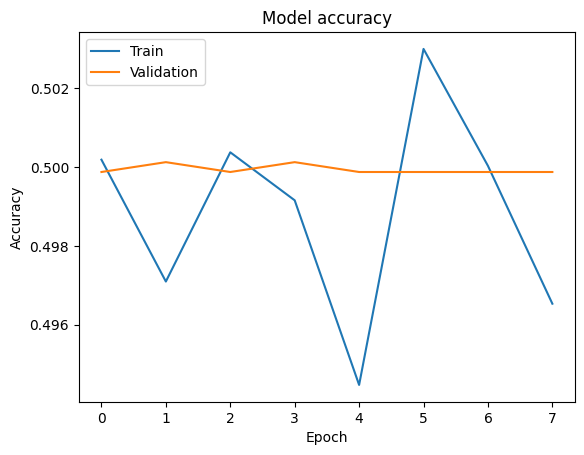

In [ ]:
plt.plot(LSTM_NET.history['accuracy'])
plt.plot(LSTM_NET.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

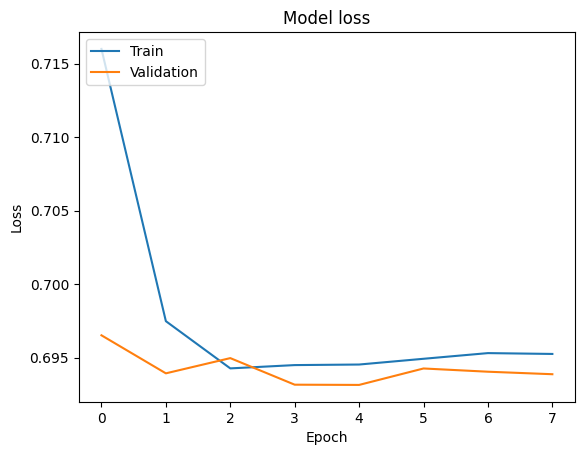

In [ ]:
plt.plot(LSTM_NET.history['loss'])
plt.plot(LSTM_NET.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(lstm.predict(test_sentences).round(), test_tags))

313/313 [==============================] - 19s 59ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.50      0.67     10000

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.34     10000
weighted avg       1.00      0.50      0.67     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uni-Directional GRU

In [ ]:
from keras.layers import Embedding, GRU, Dense, Dropout

gru_uni = Sequential()
gru_uni.add(Embedding(VOCAB_SIZE+1, DIMENSIONS,
                      embeddings_initializer=Init.Constant(words2vec_matrix),
                      input_length=MAX_LEN, trainable=False))
gru_uni.add(GRU(256, activation='tanh'))
gru_uni.add(Dense(128, activation='tanh'))
gru_uni.add(Dropout(0.5))
gru_uni.add(Dense(64, activation='tanh'))
gru_uni.add(Dropout(0.5))
gru_uni.add(Dense(1, activation='sigmoid'))

gru_uni.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1398, 128)         13039616  
                                                                 
 gru (GRU)                   (None, 256)               296448    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
gru_uni.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3)
GRU_NET_uni = gru_uni.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10
1000/1000 [==============================] - 80s 75ms/step - loss: 0.6950 - accuracy: 0.4991 - val_loss: 0.6933 - val_accuracy: 0.4999
Epoch 2/10
1000/1000 [==============================] - 75s 75ms/step - loss: 0.6945 - accuracy: 0.5004 - val_loss: 0.6935 - val_accuracy: 0.4999
Epoch 3/10
1000/1000 [==============================] - 90s 90ms/step - loss: 0.6942 - accuracy: 0.4957 - val_loss: 0.6936 - val_accuracy: 0.4999
Epoch 4/10
1000/1000 [==============================] - 71s 71ms/step - loss: 0.6937 - accuracy: 0.4997 - val_loss: 0.6933 - val_accuracy: 0.4999
Epoch 5/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.6937 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5001
Epoch 6/10
1000/1000 [==============================] - 76s 76ms/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 7/10
1000/1000 [==============================] - 71s 71ms/step - loss: 0.6935 - accuracy: 0.4957 - val_loss: 0.6932 -

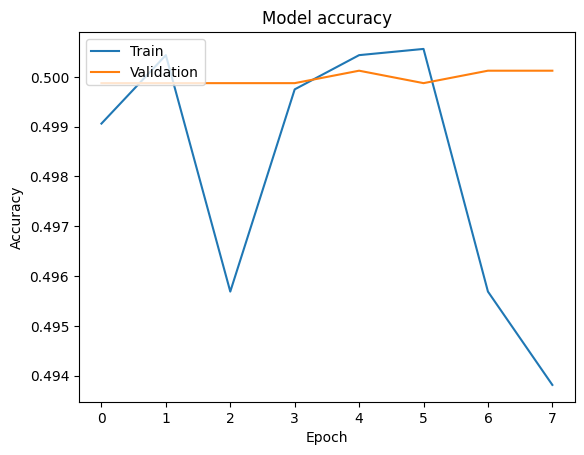

In [ ]:
plt.plot(GRU_NET_uni.history['accuracy'])
plt.plot(GRU_NET_uni.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

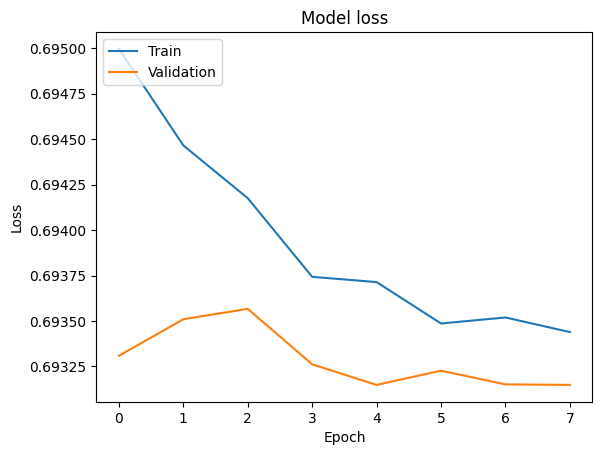

In [ ]:
plt.plot(GRU_NET_uni.history['loss'])
plt.plot(GRU_NET_uni.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(gru_uni.predict(test_sentences).round(), test_tags))

313/313 [==============================] - 10s 29ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.66     10000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.33     10000
weighted avg       1.00      0.50      0.66     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
